In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns

In [2]:
sample=pd.read_csv("UStimeseries.csv")
df=sample.copy()
df

,Date,Daily,Cumulative cases
0,1/22/2020,1,1
1,1/23/2020,0,1
2,1/24/2020,1,2
3,1/25/2020,0,2
4,1/26/2020,3,5
...,...,...,...
657,11/9/2021,79978,46696590
658,11/10/2021,96313,46792903
659,11/11/2021,58626,46851529
660,11/12/2021,139775,46991304


In [3]:
df.describe()

,Daily,Cumulative cases
count,662.000000,6.620000e+02
mean,71073.265861,1.901582e+07
std,66234.065644,1.574193e+07
min,0.000000,1.000000e+00
25%,25120.250000,2.913671e+06
50%,49077.500000,1.749492e+07
75%,94161.000000,3.335302e+07
max,303186.000000,4.705050e+07


In [4]:
df.isna()

,Date,Daily,Cumulative cases
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
657,False,False,False
658,False,False,False
659,False,False,False
660,False,False,False


In [6]:
df.isna().sum()

Date                0
Daily               0
Cumulative cases    0
dtype: int64

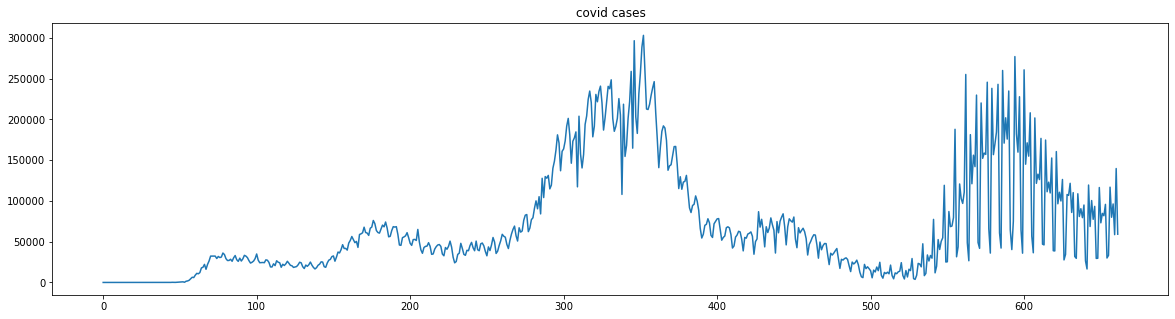

In [10]:
df.Daily.plot(figsize=(20,5),title='covid cases')
plt.show()

In [11]:
#Density of the plot
#QQ plot(quantile quantile plot)
import scipy.stats
import pylab

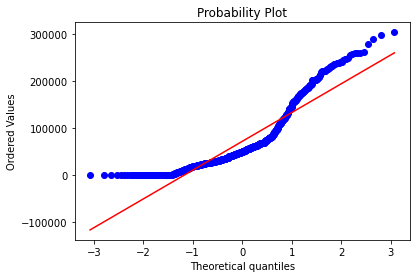

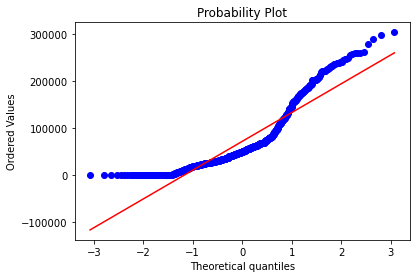

In [12]:
scipy.stats.probplot(df.Daily,plot=pylab)
plt.show(())

In [13]:
#We cannot to do normal distribution analysis

In [15]:
 #Length of time period

In [17]:
df.Date.describe()

count           662
unique          662
top       9/27/2021
freq              1
Name: Date, dtype: object

In [18]:
df.Date=pd.to_datetime(df.Date)

In [19]:
df

,Date,Daily,Cumulative cases
0,2020-01-22,1,1
1,2020-01-23,0,1
2,2020-01-24,1,2
3,2020-01-25,0,2
4,2020-01-26,3,5
...,...,...,...
657,2021-11-09,79978,46696590
658,2021-11-10,96313,46792903
659,2021-11-11,58626,46851529
660,2021-11-12,139775,46991304


In [21]:
df.Date.describe()

<ipython-input-21-364f28f1a598>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Date.describe()


count                     662
unique                    662
top       2020-02-11 00:00:00
freq                        1
first     2020-01-22 00:00:00
last      2021-11-13 00:00:00
Name: Date, dtype: object

In [22]:
#Set index

In [23]:
df.set_index("Date",inplace=True)

In [24]:
df.head()

,Daily,Cumulative cases
Date,,
2020-01-22,1,1
2020-01-23,0,1
2020-01-24,1,2
2020-01-25,0,2
2020-01-26,3,5


In [26]:
#Set desired Frequency

In [27]:
df=df.asfreq('d')

In [28]:
df.head()

,Daily,Cumulative cases
Date,,
2020-01-22,1,1
2020-01-23,0,1
2020-01-24,1,2
2020-01-25,0,2
2020-01-26,3,5


In [29]:
df.isna().sum()

Daily               0
Cumulative cases    0
dtype: int64

In [33]:
size=int(len(df)*0.8)                          

In [34]:
df_train=df.iloc[:size]
df_test=df.iloc[size:]

In [35]:
df_test

,Daily,Cumulative cases
Date,,
2021-07-04,3776,33788617
2021-07-05,8807,33797424
2021-07-06,23388,33820812
2021-07-07,22569,33843381
2021-07-08,19160,33862541
...,...,...
2021-11-09,79978,46696590
2021-11-10,96313,46792903
2021-11-11,58626,46851529


In [36]:
df_train

,Daily,Cumulative cases
Date,,
2020-01-22,1,1
2020-01-23,0,1
2020-01-24,1,2
2020-01-25,0,2
2020-01-26,3,5
...,...,...
2021-06-29,6719,33719986
2021-06-30,16280,33736266
2021-07-01,14573,33750839


In [38]:
#White noise

In [39]:
wn=np.random.normal(loc=df.Daily.mean(),scale=df.Daily.std(),size=len(df))

In [40]:
df['wn']=wn

In [41]:
df

,Daily,Cumulative cases,wn
Date,,,
2020-01-22,1,1,69175.176430
2020-01-23,0,1,131238.422570
2020-01-24,1,2,122985.488768
2020-01-25,0,2,96183.169300
2020-01-26,3,5,143767.472116
...,...,...,...
2021-11-09,79978,46696590,84401.016686
2021-11-10,96313,46792903,103855.140673
2021-11-11,58626,46851529,120038.785542


In [42]:
df.describe()

,Daily,Cumulative cases,wn
count,662.000000,6.620000e+02,662.000000
mean,71073.265861,1.901582e+07,71904.968504
std,66234.065644,1.574193e+07,65547.253581
min,0.000000,1.000000e+00,-126384.628918
25%,25120.250000,2.913671e+06,28787.696904
50%,49077.500000,1.749492e+07,72706.406631
75%,94161.000000,3.335302e+07,113196.838015
max,303186.000000,4.705050e+07,255549.009038


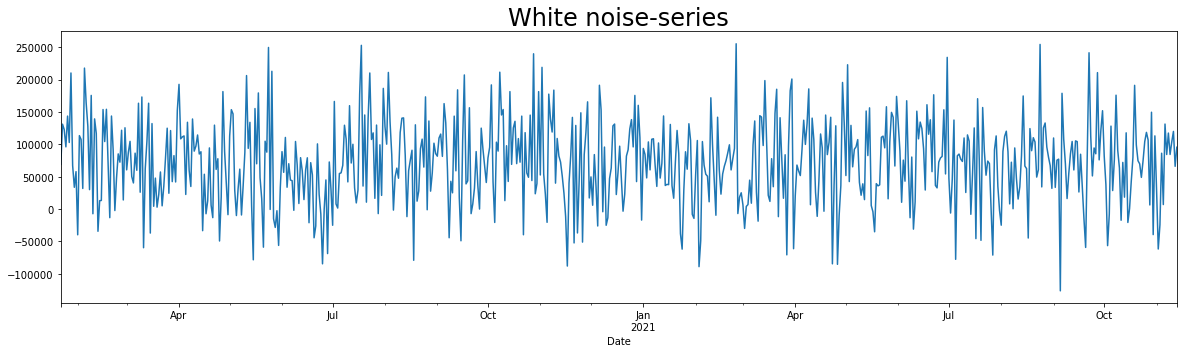

In [44]:
df.wn.plot(figsize=(20,5))
plt.title("White noise-series",size=24)
plt.show()

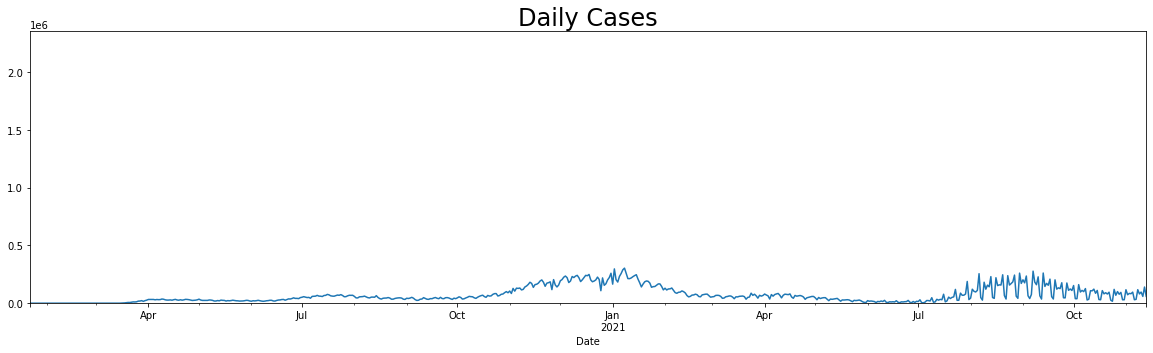

In [51]:
df.Daily.plot(figsize=(20,5))
plt.title("Daily Cases",size=24)
plt.ylim(0,2350000)
plt.show()

In [52]:
#Stationarity
sts.adfuller(df.Daily)

(-2.191282567337383,
 0.20942458218265947,
 20,
 641,
 {'1%': -3.4405928713433735,
  '5%': -2.866059505075432,
  '10%': -2.5691768365293113},
 14409.802290588477)

In [53]:
#Seasonality

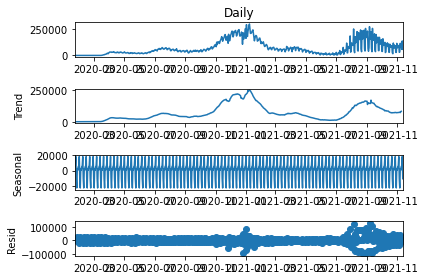

In [63]:
sd=seasonal_decompose(df.Daily,model="addictive")
sd.plot()
plt.show()

In [64]:
#ACF

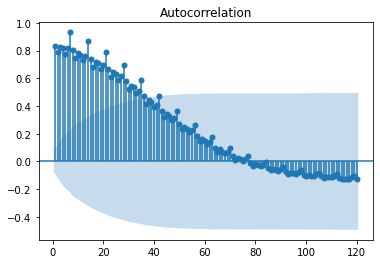

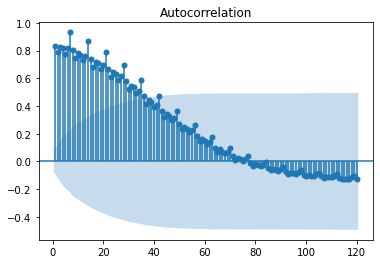

In [106]:
sgt.plot_acf(df.Daily,lags=120,zero=False)

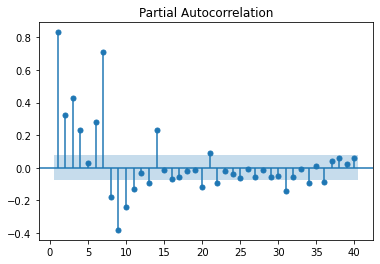

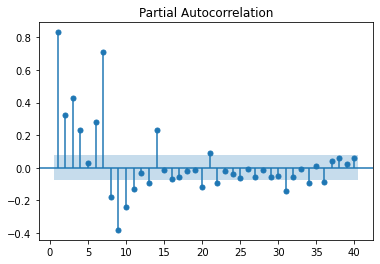

In [71]:
sgt.plot_pacf(df.Daily,lags=40,zero=False)

In [74]:
#AR(1) model
model_ar=ARMA(df.Daily,order=(1,0))

C:\Users\radha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [75]:
result_ar=model_ar.fit()

In [77]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Daily   No. Observations:                  662
Model:                     ARMA(1, 0)   Log Likelihood               -7899.762
Method:                       css-mle   S.D. of innovations          36803.676
Date:                Tue, 14 Dec 2021   AIC                          15805.525
Time:                        01:26:28   BIC                          15819.011
Sample:                    01-22-2020   HQIC                         15810.751
                         - 11-13-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.107e+04   8383.465      8.478      0.000    5.46e+04    8.75e+04
ar.L1.Daily     0.8306      0.022     38.554      0.000       0.788       0.873
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2039           +0.0000j            1.2039            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
#AR(2) model
model_ar2=ARMA(df.Daily,order=(2,0))
result_ar2=model_ar2.fit()
result_ar2.summary()

C:\Users\radha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Daily   No. Observations:                  662
Model:                     ARMA(2, 0)   Log Likelihood               -7863.339
Method:                       css-mle   S.D. of innovations          34827.690
Date:                Tue, 14 Dec 2021   AIC                          15734.679
Time:                        01:30:36   BIC                          15752.660
Sample:                    01-22-2020   HQIC                         15741.647
                         - 11-13-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.107e+04   1.16e+04      6.127      0.000    4.83e+04    9.38e+04
ar.L1.Daily     0.5614      0.037     15.248      0.000       0.489       0.634
ar.L2.Daily     0.3237      0.037      8.779      0.000       0.251       0.396
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0927           +0.0000j            1.0927            0.0000
AR.2           -2.8269           +0.0000j            2.8269            0.5000
-----------------------------------------------------------------------------
"""

In [80]:
#AR(3) model
model_ar3=ARMA(df.Daily,order=(3,0))
result_ar3=model_ar3.fit()
result_ar3.summary()

C:\Users\radha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Daily   No. Observations:                  662
Model:                     ARMA(3, 0)   Log Likelihood               -7797.283
Method:                       css-mle   S.D. of innovations          31506.084
Date:                Tue, 14 Dec 2021   AIC                          15604.566
Time:                        01:33:15   BIC                          15627.042
Sample:                    01-22-2020   HQIC                         15613.277
                         - 11-13-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.107e+04   1.77e+04      4.016      0.000    3.64e+04    1.06e+05
ar.L1.Daily     0.4252      0.035     12.096      0.000       0.356       0.494
ar.L2.Daily     0.0815      0.039      2.094      0.036       0.005       0.158
ar.L3.Daily     0.4268      0.035     12.107      0.000       0.358       0.496
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0347           -0.0000j            1.0347           -0.0000
AR.2           -0.6128           -1.3744j            1.5048           -0.3168
AR.3           -0.6128           +1.3744j            1.5048            0.3168
-----------------------------------------------------------------------------
"""

In [81]:
#AR(2) model
model_ar4=ARMA(df.Daily,order=(4,0))
result_ar4=model_ar4.fit()
result_ar4.summary()

C:\Users\radha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Daily   No. Observations:                  662
Model:                     ARMA(4, 0)   Log Likelihood               -7779.416
Method:                       css-mle   S.D. of innovations          30662.313
Date:                Tue, 14 Dec 2021   AIC                          15570.833
Time:                        01:35:06   BIC                          15597.804
Sample:                    01-22-2020   HQIC                         15581.286
                         - 11-13-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.107e+04   2.17e+04      3.275      0.001    2.85e+04    1.14e+05
ar.L1.Daily     0.3270      0.038      8.635      0.000       0.253       0.401
ar.L2.Daily     0.0639      0.038      1.685      0.092      -0.010       0.138
ar.L3.Daily     0.3275      0.038      8.614      0.000       0.253       0.402
ar.L4.Daily     0.2300      0.038      6.062      0.000       0.156       0.304
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0214           -0.0000j            1.0214           -0.0000
AR.2           -0.1770           -1.4156j            1.4266           -0.2698
AR.3           -0.1770           +1.4156j            1.4266            0.2698
AR.4           -2.0912           -0.0000j            2.0912           -0.5000
-----------------------------------------------------------------------------
"""

In [86]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [88]:
LLR_test(model_ar3,model_ar4)

0.0

In [93]:
LLR_test(model_ar,model_ar2)

0.0

In [94]:
model_ar4=ARMA(df.Daily,order=(4,0))
result_ar4=model_ar4.fit()
print(result_ar4.summary())
print("LLR Test:"+ str(LLR_test(model_ar3,model_ar4)))

C:\Users\radha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                  Daily   No. Observations:                  662
Model:                     ARMA(4, 0)   Log Likelihood               -7779.416
Method:                       css-mle   S.D. of innovations          30662.313
Date:                Tue, 14 Dec 2021   AIC                          15570.833
Time:                        01:44:27   BIC                          15597.804
Sample:                    01-22-2020   HQIC                         15581.286
                         - 11-13-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.107e+04   2.17e+04      3.275      0.001    2.85e+04    1.14e+05
ar.L1.Daily     0.3270      0.038      8.635      0.000       0.253       0.401
ar.L2.Daily     0.0639      0.038      1.685    

In [105]:
model_ar8=ARMA(df.Daily,order=(70,0))
result_ar8=model_ar8.fit()
print(result_ar8.summary())
# print("LLR Test:"+ str(LLR_test(model_ar3,model_ar8)))

C:\Users\radha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


KeyboardInterrupt: 

In [96]:
 sts.adfuller(df.Daily)

(-2.191282567337383,
 0.20942458218265947,
 20,
 641,
 {'1%': -3.4405928713433735,
  '5%': -2.866059505075432,
  '10%': -2.5691768365293113},
 14409.802290588477)

In [100]:
model_ar8=ARMA(df.Daily,order=(10,0))
result_ar8=model_ar8.fit()
print(result_ar8.summary())
# print("LLR Test:"+ str(LLR_test(model_ar3,model_ar8)))

                              ARMA Model Results                              
Dep. Variable:                  Daily   No. Observations:                  662
Model:                    ARMA(10, 0)   Log Likelihood               -7450.277
Method:                       css-mle   S.D. of innovations          18546.222
Date:                Tue, 14 Dec 2021   AIC                          14924.555
Time:                        02:03:49   BIC                          14978.498
Sample:                    01-22-2020   HQIC                         14945.460
                         - 11-13-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.107e+04   2.86e+04      2.489      0.013    1.51e+04    1.27e+05
ar.L1.Daily      0.0962      0.038      2.549      0.011       0.022       0.170
ar.L2.Daily      0.2883      0.036      8.06

In [99]:
print("Hello")

Hello
